In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

2023-03-19 13:38:02.453171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 13:38:02.559339: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 13:38:02.559357: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 13:38:03.242963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import gd

In [3]:
# Set Hyperparameters
epochs = 10
ann.num_layers = 5
ann.hidden_size = 4
ann.batch_size = 1000

In [4]:
## Functions
# ann.activation = ann_utils.tanh
# ann.d_activation = ann_utils.d_tanh
ann.activation = ann_utils.tanh
ann.d_activation = ann_utils.d_tanh
ann.weight_init = ann_utils.xavier_init

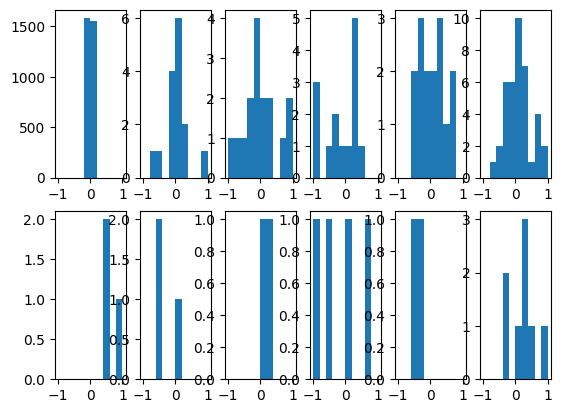

In [5]:
# Define an ANN.
nn = ann(28 * 28, 10)
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

In [6]:
# Train the ANN.

for i in range(epochs):
    gd.batch_gd(nn, X_train, y_train)

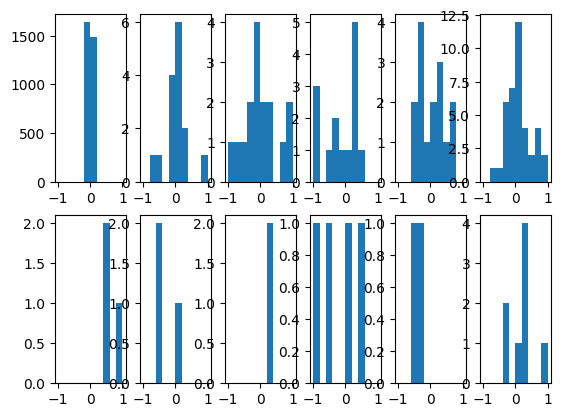

In [7]:
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

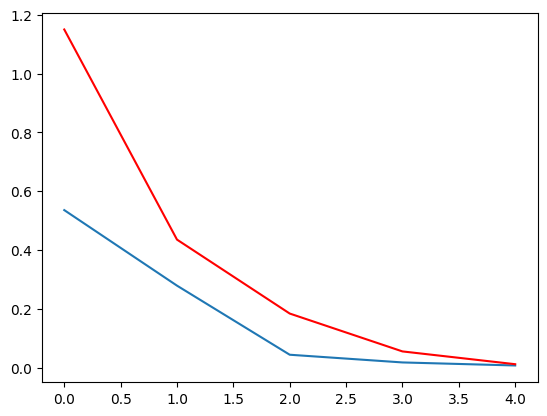

In [8]:
i, j = 1, 500
u = nn.predict(X_train[i])
ua = nn.a
uh = nn.h

v = nn.predict(X_train[j])
va = nn.a
vh = nn.h

diffa = []
diffh = []

for i in range(len(va)):
    diffh.append(np.linalg.norm(vh[i] - uh[i]))
    diffa.append(np.linalg.norm(va[i] - ua[i]))

plt.plot(diffh)
plt.plot(diffa, 'r')

In [9]:
print(ua[0])
print(va[0])
print(uh[0])
print(vh[0])

[[-1.65708184]
 [-0.02777567]
 [-0.76951774]
 [ 1.95077061]]
[[-2.33426023]
 [-0.61035487]
 [-0.88746904]
 [ 1.23582539]]
[[-0.92982305]
 [-0.02776853]
 [-0.64664894]
 [ 0.96037929]]
[[-0.98140227]
 [-0.54437685]
 [-0.71014139]
 [ 0.84426077]]


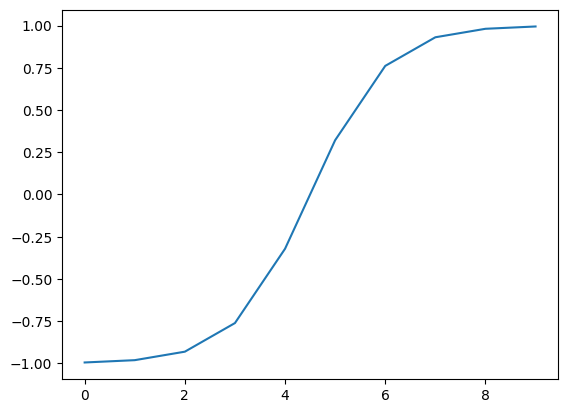

In [10]:
plt.plot(ann_utils.tanh(np.linspace(-3, 3, 10)))

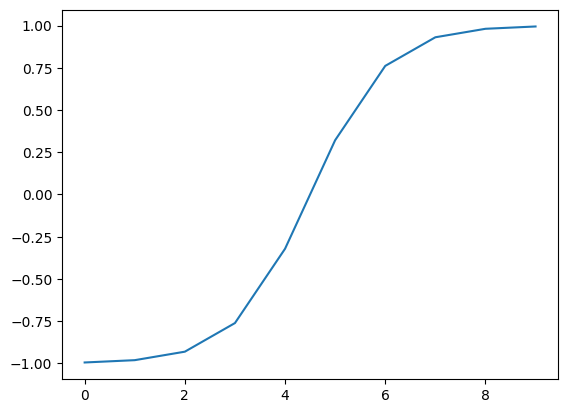

In [11]:
plt.plot(np.tanh(np.linspace(-3, 3, 10)))